In [14]:
library(Seurat)
library(dplyr)
library(ggplot2)
library(ggpubr)
library(ggprism)
library(MAST)
library(readr)
library(RColorBrewer)
library(scales)
library(rstatix)
library(data.table)
library(googlesheets4)
source("/diskmnt/Projects/Users/Evan.p/scripts/Rscript/jupyter_support_functions.R")
source("/diskmnt/Projects/Users/Evan.p/scripts/Rscript/visiualization_support_functions.R")

In [2]:
geneset_dir = '/diskmnt/Projects/MetNet_analysis_2/Colorectal/Analysis/genesets'
colon_epithelial_geneset = readRDS(file.path(geneset_dir, 'colon_epithelium_genesets.rds'))
module_geneset = readRDS(file.path(geneset_dir, 'gene_modules.rds'))
Hallmark_EMT = readRDS(file.path(geneset_dir, 'Hallmark_EMT_genesets.rds'))
Hallmark_hypoxia = readRDS(file.path(geneset_dir, 'Hallmark_hpoxia_genesets.rds'))
Kohn_EMT = readRDS(file.path(geneset_dir, 'Kohn_Emt_genesets.rds'))
SenMayo = readRDS(file.path(geneset_dir, 'SenMayo_genesets.rds'))
module_geneset <- c(module_geneset, Hallmark_hypoxia)

In [30]:
setwd('/diskmnt/Projects/MetNet_analysis_2/Colorectal/snMultiome/rds_objects/cell_types_subset/RNA/epithelial')
epithelial_reint = readRDS('57_Integrated_normalized_mCRC_snRNA_noDB_v7_epithelial_clean5.rds')
epithelial_reint

An object of class Seurat 
71822 features across 225162 samples within 2 assays 
Active assay: RNA (36601 features, 0 variable features)
 2 layers present: counts, data
 1 other assay present: SCT
 8 dimensional reductions calculated: pca, umap.rna, integrated.scvi, mCRCv4_umap.scvi, mCRCv5_umap.scvi, mCRCv6_umap.scvi, epithelial_umap.scvi, epithelial_umap2.scvi

In [31]:
colnames(epithelial_reint@meta.data)
unique(epithelial_reint$epi_cell_type)

[1] "orig.ident"              "Patient_ID"             
 [3] "nCount_RNA"              "nFeature_RNA"           
 [5] "percent.mito"            "nCount_SCT"             
 [7] "nFeature_SCT"            "seurat_clusters"        
 [9] "S.Score"                 "G2M.Score"              
[11] "Phase"                   "SCT_snn_res.2"          
[13] "cell_type_RNA"           "cell_type_RNA_simple"   
[15] "Age"                     "Sex"                    
[17] "Site_of_Origin"          "Tissue_Type"            
[19] "Primary_Side"            "MSI"                    
[21] "MSI_score"               "Tx_in_6mo"              
[23] "scrublet_doublet"        "DF_doublet"             
[25] "cell_type_integrated"    "cell_type_simple"       
[27] "cell_type_integrated2"   "cell_type_simple2"      
[29] "mCRCv6_clusters_0.2"     "mCRCv6_clusters_0.4"    
[31] "mCRCv6_clusters_0.6"     "mCRCv6_clusters_0.8"    
[33] "mCRCv6_clusters_1"       "mCRCv6_clusters_1.2"    
[35] "mCRCv6_clusters_1.4"     "mCRCv6_clusters_1.6"    
[37] "mCRCv6_clusters_1.8"     "mCRCv6_clusters_2"      
[39] "cell_type_simple3"       "cell_type_integrated3"  
[41] "epithelial_clusters_0.1" "APC_mutation"           
[43] "KRAS_mutation"           "TP53_mutation"          
[45] "APC_mut"                 "KRAS_mut"               
[47] "TP53_mut"                "epithelial_cluster_sub6"
[49] "epi_clusters_0.1"        "epithelial_cluster_sub0"
[51] "epithelial_cluster_sub2" "epithelial_cluster_sub3"
[53] "epi_cell_type"           "removal"

[1] "APCDD1+ tumor"                 "Proliferative tumor"          
 [3] "Stem-like tumor"               "Angiogenic tumor"             
 [5] "Proliferative stem-like tumor" "Enteroendocrine-like cells"   
 [7] "Goblet cells"                  "Transit-amplifying cells"     
 [9] "Enterocytes"                   "Stem cells"                   
[11] "Tuft cells"

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



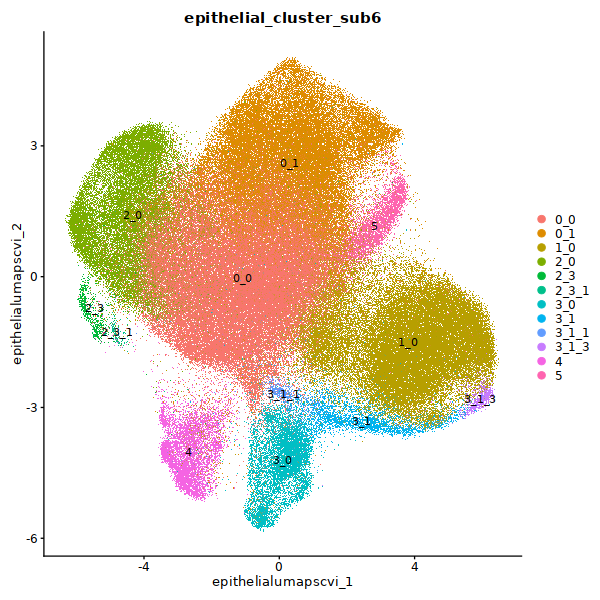

In [32]:
set_size(6,6)
DimPlot(epithelial_reint, reduction = 'epithelial_umap.scvi', group.by = 'epithelial_cluster_sub6', label = TRUE)

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



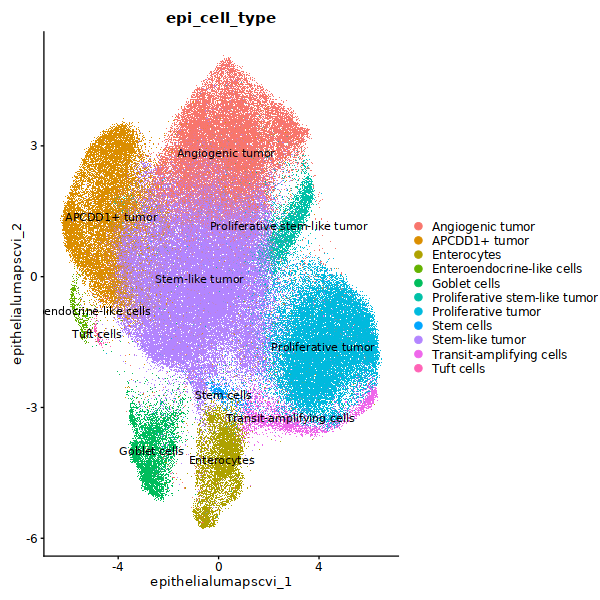

In [33]:
set_size(6,6)
DimPlot(epithelial_reint, reduction = 'epithelial_umap.scvi', group.by = 'epi_cell_type', label = TRUE)

## subset of Stem-like tumor

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 87446
Number of edges: 849268

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8388
Number of communities: 16
Elapsed time: 10 seconds


7 singletons identified. 9 final clusters.



[1] "APCDD1+ tumor"                 "Proliferative tumor"          
 [3] "Stem-like tumor_0"             "Angiogenic tumor"             
 [5] "Stem-like tumor_3"             "Stem-like tumor_5"            
 [7] "Stem-like tumor_1"             "Proliferative stem-like tumor"
 [9] "Stem-like tumor_8"             "Stem-like tumor_6"            
[11] "Stem-like tumor_2"             "Stem-like tumor_4"            
[13] "Enteroendocrine-like cells"    "Stem-like tumor_7"            
[15] "Goblet cells"                  "Transit-amplifying cells"     
[17] "Enterocytes"                   "Stem cells"                   
[19] "Tuft cells"

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



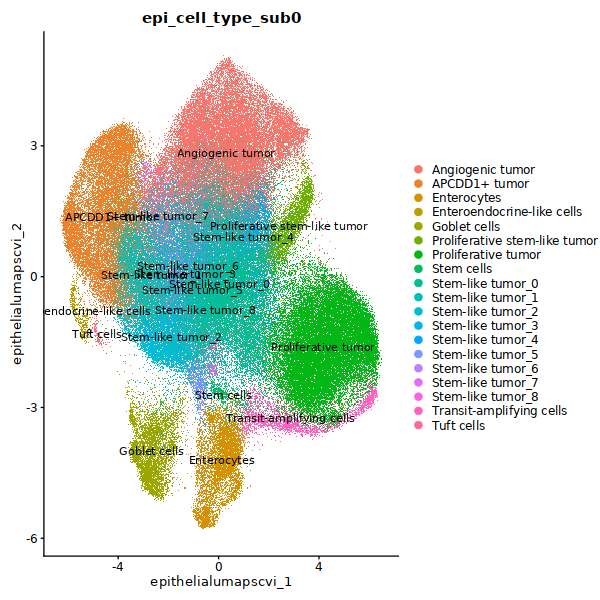

In [37]:
Idents(epithelial_reint) = "epi_cell_type"
epithelial_reint = FindSubCluster(object = epithelial_reint,
                                  cluster = 'Stem-like tumor',
                                  graph.name = 'RNA_snn',
                                  subcluster.name = "epi_cell_type_sub0",
                                  resolution = 0.3,
                                  algorithm = 1
                                  )
unique(epithelial_reint$epi_cell_type_sub0)

set_size(6,6)
DimPlot(epithelial_reint, reduction = 'epithelial_umap.scvi', group.by = 'epi_cell_type_sub0', label = TRUE)

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for size is already present.
Adding another scale for size, which will replace the existing scale.


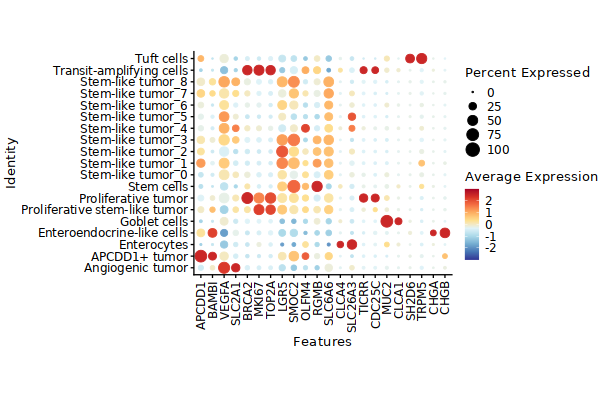

In [38]:
DefaultAssay(epithelial_reint) <- 'RNA'

rdylbu_colors <- rev(colorRampPalette(brewer.pal(10, "RdYlBu"))(10))
color_breaks <- c(-2, -1, 0, 1, 2)
#dotplot.color <- colorRampPalette(c('#eae2b7','#fcbf49','#f77f00','#d62828', '#003049'))(10) 

p <- DotPlot(epithelial_reint, 
              group.by = 'epi_cell_type_sub0', 
              feature = c('APCDD1', 'BAMBI', 'VEGFA', 'SLC2A1', 'BRCA2', 'MKI67', 'TOP2A', 'LGR5', 'SMOC2', 'OLFM4', 'RGMB', 'SLC6A6', 
                          'CLCA4', 'SLC26A3', 'TICRR', 'CDC25C', 'MUC2', 'CLCA1', 'SH2D6', 'TRPM5', 'CHGA', 'CHGB')
             ) +
      theme(axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0.5)) + #, legend.byrow = FALSE, legend.direction = 'vertical', legend.position = 'bottom') +
      coord_fixed() +
      scale_color_gradientn(colors = rdylbu_colors, 
                            limits = c(-3, 3),    # Set limits to -2 and 2
                            breaks = color_breaks # Specify the breaks
      ) +         
      scale_size_area(limits = c(0, 100), oob = scales::squish)

set_size(6,4)
p

In [39]:
setwd('/diskmnt/Projects/MetNet_analysis_2/Colorectal/snMultiome/rds_objects/cell_types_subset/RNA/epithelial/subcluster_umaps')
# Loop through all unique clusters in the epi_cell_type_sub0 metadata column
for (cluster in unique(epithelial_reint$epi_cell_type_sub0)) {
  
  # Print the current cluster for debugging purposes
  cat("Processing cluster:", cluster, "\n")
  
  # Create the file name for saving the plot
  file_name <- paste0("UMAP_Highlight_", gsub(" ", "_", cluster), ".png")
  
  # Generate the UMAP plot for the current cluster
  p = Highlight_Cluster_UMAP(
    seurat_object = epithelial_reint,
    metadata_column = 'epi_cell_type_sub0',
    cell_type = cluster,  # Pass the cluster name dynamically
    umap_reduction = 'epithelial_umap.scvi',
    highlight_color = "#B56727", 
    background_color = "lightgray", 
    background_alpha = 0.3
  )
    
  ggsave(
  filename = paste0("Highlight_UMAP_", gsub(" ", "_", cluster), ".jpg"),
  plot = p,
  width = 6,
  height = 6,
  dpi = 300)
}


Processing cluster: APCDD1+ tumor 
Processing cluster: Proliferative tumor 
Processing cluster: Stem-like tumor_0 
Processing cluster: Angiogenic tumor 
Processing cluster: Stem-like tumor_3 
Processing cluster: Stem-like tumor_5 
Processing cluster: Stem-like tumor_1 
Processing cluster: Proliferative stem-like tumor 
Processing cluster: Stem-like tumor_8 
Processing cluster: Stem-like tumor_6 
Processing cluster: Stem-like tumor_2 
Processing cluster: Stem-like tumor_4 
Processing cluster: Enteroendocrine-like cells 
Processing cluster: Stem-like tumor_7 
Processing cluster: Goblet cells 
Processing cluster: Transit-amplifying cells 
Processing cluster: Enterocytes 
Processing cluster: Stem cells 
Processing cluster: Tuft cells 


In [40]:
epithelial_reint@meta.data <- epithelial_reint@meta.data %>% 
                              mutate(epi_cell_type2 = case_when(
                                  epi_cell_type_sub0 == 'Stem-like tumor_0' ~ 'Intestine-like',
                                  epi_cell_type_sub0 == 'Stem-like tumor_1' ~ 'Tumor-ISC-like',
                                  epi_cell_type_sub0 == 'Stem-like tumor_2' ~ 'Tumor-ISC-like',
                                  epi_cell_type_sub0 == 'Stem-like tumor_3' ~ 'Tumor-ISC-like',
                                  epi_cell_type_sub0 == 'Stem-like tumor_4' ~ 'Intestine-like',
                                  epi_cell_type_sub0 == 'Stem-like tumor_5' ~ 'Secretory-intestine',
                                  epi_cell_type_sub0 == 'Stem-like tumor_6' ~ 'Intestine-like',
                                  epi_cell_type_sub0 == 'Stem-like tumor_7' ~ 'Intestine-like',
                                  epi_cell_type_sub0 == 'Stem-like tumor_8' ~ 'Intestine-like',
                                  TRUE ~ epi_cell_type
                              ))

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



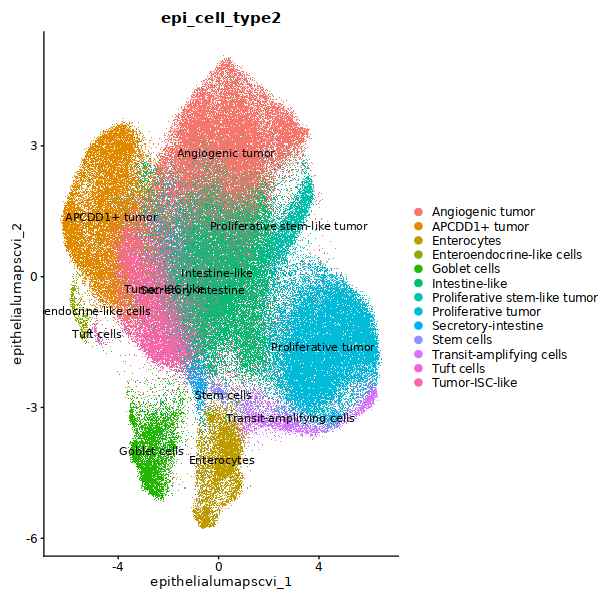

In [41]:
set_size(6,6)
DimPlot(epithelial_reint, reduction = 'epithelial_umap.scvi', group.by = 'epi_cell_type2', label = TRUE)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 4077
Number of edges: 34933

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9262
Number of communities: 2
Elapsed time: 0 seconds


[1] "APCDD1+ tumor"                 "Proliferative tumor"          
 [3] "Intestine-like"                "Angiogenic tumor"             
 [5] "Tumor-ISC-like"                "Secretory-intestine_0"        
 [7] "Proliferative stem-like tumor" "Secretory-intestine_1"        
 [9] "Enteroendocrine-like cells"    "Goblet cells"                 
[11] "Transit-amplifying cells"      "Enterocytes"                  
[13] "Stem cells"                    "Tuft cells"

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



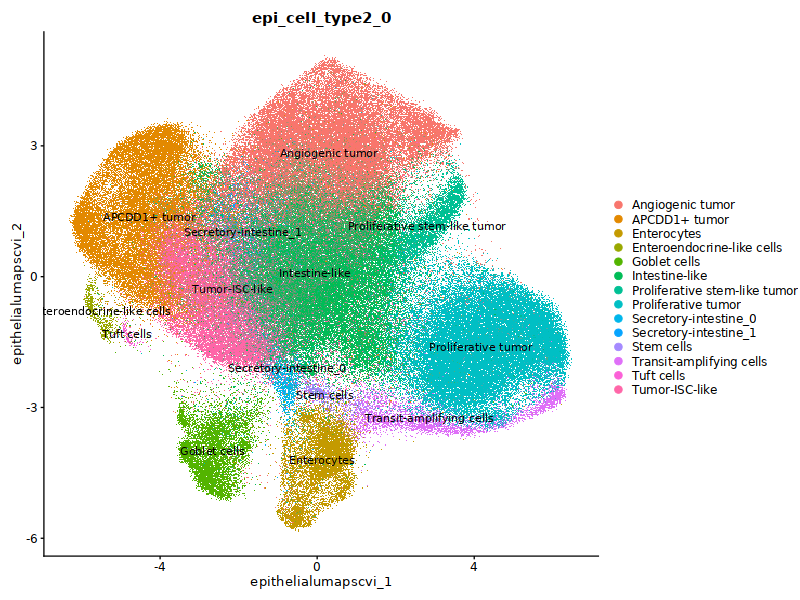

In [42]:
Idents(epithelial_reint) = "epi_cell_type2"
epithelial_reint = FindSubCluster(object = epithelial_reint,
                                  cluster = 'Secretory-intestine',
                                  graph.name = 'RNA_snn',
                                  subcluster.name = "epi_cell_type2_0",
                                  resolution = 0.1,
                                  algorithm = 1
                                  )
unique(epithelial_reint$epi_cell_type2_0)

set_size(8,6)
DimPlot(epithelial_reint, reduction = 'epithelial_umap.scvi', group.by = 'epi_cell_type2_0', label = TRUE)

In [43]:
setwd('/diskmnt/Projects/MetNet_analysis_2/Colorectal/snMultiome/rds_objects/cell_types_subset/RNA/epithelial/subcluster_umaps')
# Loop through all unique clusters in the epi_cell_type_sub0 metadata column
for (cluster in unique(epithelial_reint$epi_cell_type2_0)) {
  
  # Print the current cluster for debugging purposes
  cat("Processing cluster:", cluster, "\n")
  
  # Create the file name for saving the plot
  file_name <- paste0("UMAP_Highlight_", gsub(" ", "_", cluster), ".png")
  
  # Generate the UMAP plot for the current cluster
  p = Highlight_Cluster_UMAP(
    seurat_object = epithelial_reint,
    metadata_column = 'epi_cell_type2_0',
    cell_type = cluster,  # Pass the cluster name dynamically
    umap_reduction = 'epithelial_umap.scvi',
    highlight_color = "#B56727", 
    background_color = "lightgray", 
    background_alpha = 0.3
  )
    
  ggsave(
  filename = paste0("Highlight_UMAP_", gsub(" ", "_", cluster), ".jpg"),
  plot = p,
  width = 6,
  height = 6,
  dpi = 300)
}


Processing cluster: APCDD1+ tumor 
Processing cluster: Proliferative tumor 
Processing cluster: Intestine-like 
Processing cluster: Angiogenic tumor 
Processing cluster: Tumor-ISC-like 
Processing cluster: Secretory-intestine_0 
Processing cluster: Proliferative stem-like tumor 
Processing cluster: Secretory-intestine_1 
Processing cluster: Enteroendocrine-like cells 
Processing cluster: Goblet cells 
Processing cluster: Transit-amplifying cells 
Processing cluster: Enterocytes 
Processing cluster: Stem cells 
Processing cluster: Tuft cells 


In [44]:
epithelial_reint@meta.data <- epithelial_reint@meta.data %>% 
                              mutate(epi_cell_type3 = case_when(
                                  epi_cell_type2_0 == 'Secretory-intestine_1' ~ 'Intestine-like',
                                  epi_cell_type2_0 == 'Secretory-intestine_0' ~ 'Secretory-intestine',
                                  TRUE ~ epi_cell_type2_0
                              ))

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



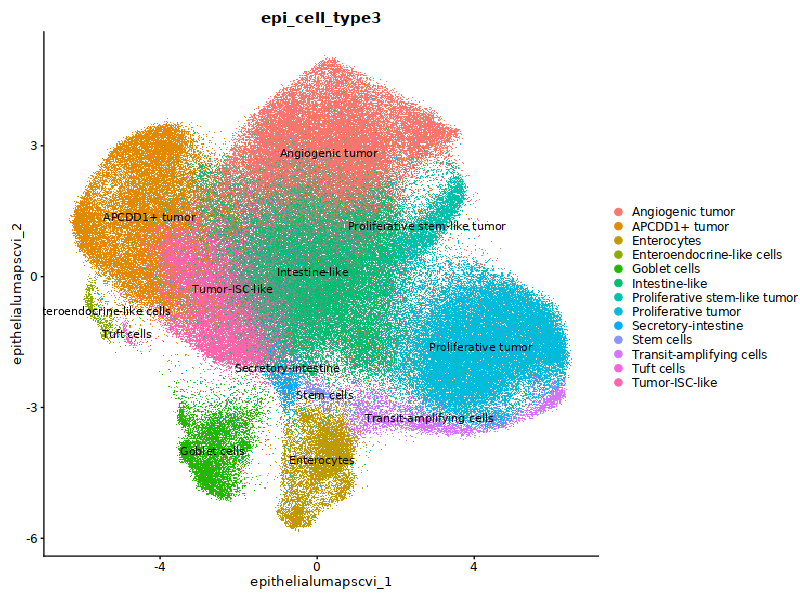

In [45]:
set_size(8,6)
DimPlot(epithelial_reint, reduction = 'epithelial_umap.scvi', group.by = 'epi_cell_type3', label = TRUE)

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for size is already present.
Adding another scale for size, which will replace the existing scale.


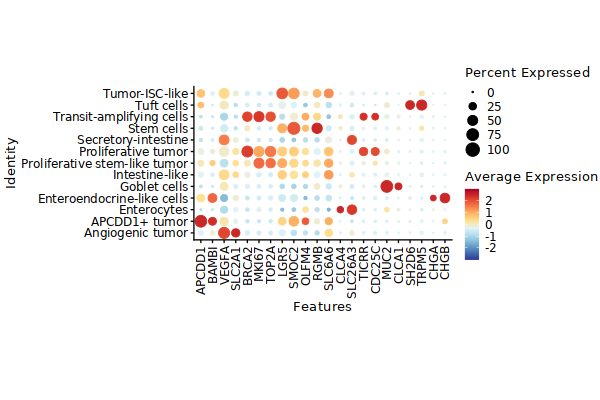

In [46]:
DefaultAssay(epithelial_reint) <- 'RNA'

rdylbu_colors <- rev(colorRampPalette(brewer.pal(10, "RdYlBu"))(10))
color_breaks <- c(-2, -1, 0, 1, 2)
#dotplot.color <- colorRampPalette(c('#eae2b7','#fcbf49','#f77f00','#d62828', '#003049'))(10) 

p6 <- DotPlot(epithelial_reint, 
              group.by = 'epi_cell_type3', 
              feature = c('APCDD1', 'BAMBI', 'VEGFA', 'SLC2A1', 'BRCA2', 'MKI67', 'TOP2A', 'LGR5', 'SMOC2', 'OLFM4', 'RGMB', 'SLC6A6', 
                          'CLCA4', 'SLC26A3', 'TICRR', 'CDC25C', 'MUC2', 'CLCA1', 'SH2D6', 'TRPM5', 'CHGA', 'CHGB')
             ) +
      theme(axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0.5)) + #, legend.byrow = FALSE, legend.direction = 'vertical', legend.position = 'bottom') +
      coord_fixed() +
      scale_color_gradientn(colors = rdylbu_colors, 
                            limits = c(-3, 3),    # Set limits to -2 and 2
                            breaks = color_breaks # Specify the breaks
      ) +         
      scale_size_area(limits = c(0, 100), oob = scales::squish)

set_size(6,4)
p6

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 41463
Number of edges: 487362

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8614
Number of communities: 11
Elapsed time: 3 seconds


[1] "APCDD1+ tumor"                 "Proliferative tumor"          
 [3] "Intestine-like"                "Angiogenic tumor_1"           
 [5] "Angiogenic tumor_0"            "Tumor-ISC-like"               
 [7] "Secretory-intestine"           "Angiogenic tumor_3"           
 [9] "Proliferative stem-like tumor" "Angiogenic tumor_2"           
[11] "Angiogenic tumor_7"            "Angiogenic tumor_5"           
[13] "Angiogenic tumor_4"            "Enteroendocrine-like cells"   
[15] "Angiogenic tumor_6"            "Angiogenic tumor_8"           
[17] "Angiogenic tumor_9"            "Goblet cells"                 
[19] "Transit-amplifying cells"      "Enterocytes"                  
[21] "Stem cells"                    "Tuft cells"                   
[23] "Angiogenic tumor_10"

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



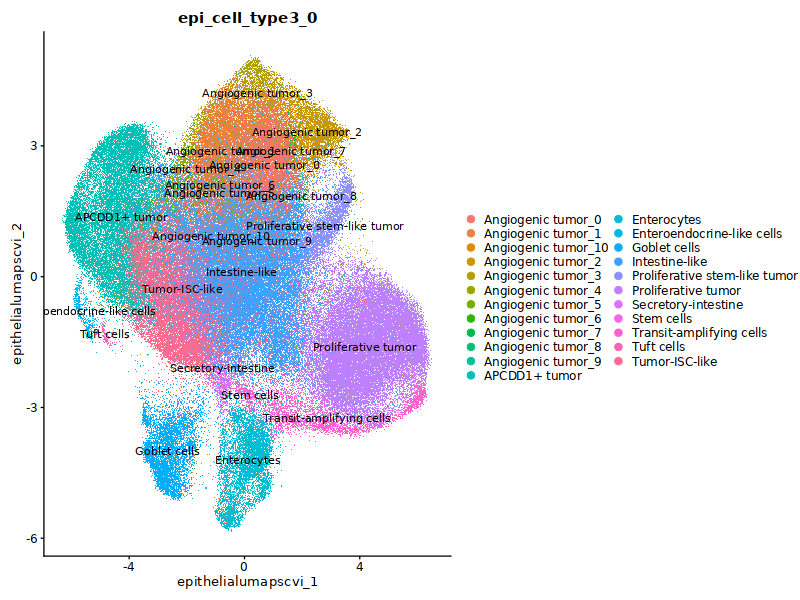

In [47]:
Idents(epithelial_reint) = "epi_cell_type3"
epithelial_reint = FindSubCluster(object = epithelial_reint,
                                  cluster = 'Angiogenic tumor',
                                  graph.name = 'RNA_snn',
                                  subcluster.name = "epi_cell_type3_0",
                                  resolution = 0.3,
                                  algorithm = 1
                                  )
unique(epithelial_reint$epi_cell_type3_0)

set_size(8,6)
DimPlot(epithelial_reint, reduction = 'epithelial_umap.scvi', group.by = 'epi_cell_type3_0', label = TRUE)

In [48]:
table(epithelial_reint$epi_cell_type3_0)


           Angiogenic tumor_0            Angiogenic tumor_1 
                        15859                         11030 
          Angiogenic tumor_10            Angiogenic tumor_2 
                            2                          6998 
           Angiogenic tumor_3            Angiogenic tumor_4 
                         2676                          2103 
           Angiogenic tumor_5            Angiogenic tumor_6 
                         1818                           517 
           Angiogenic tumor_7            Angiogenic tumor_8 
                          295                           163 
           Angiogenic tumor_9                 APCDD1+ tumor 
                            2                         27560 
                  Enterocytes    Enteroendocrine-like cells 
                         8989                           720 
                 Goblet cells                Intestine-like 
                         7698                         53104 
Proliferative stem-like

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for size is already present.
Adding another scale for size, which will replace the existing scale.


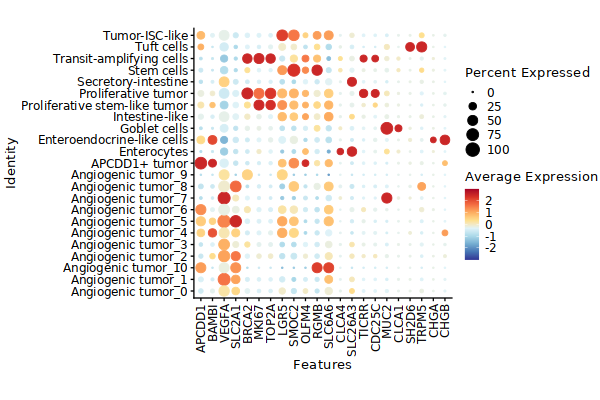

In [49]:
DefaultAssay(epithelial_reint) <- 'RNA'

rdylbu_colors <- rev(colorRampPalette(brewer.pal(10, "RdYlBu"))(10))
color_breaks <- c(-2, -1, 0, 1, 2)
#dotplot.color <- colorRampPalette(c('#eae2b7','#fcbf49','#f77f00','#d62828', '#003049'))(10) 

p6 <- DotPlot(epithelial_reint, 
              group.by = 'epi_cell_type3_0', 
              feature = c('APCDD1', 'BAMBI', 'VEGFA', 'SLC2A1', 'BRCA2', 'MKI67', 'TOP2A', 'LGR5', 'SMOC2', 'OLFM4', 'RGMB', 'SLC6A6', 
                          'CLCA4', 'SLC26A3', 'TICRR', 'CDC25C', 'MUC2', 'CLCA1', 'SH2D6', 'TRPM5', 'CHGA', 'CHGB')
             ) +
      theme(axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0.5)) + #, legend.byrow = FALSE, legend.direction = 'vertical', legend.position = 'bottom') +
      coord_fixed() +
      scale_color_gradientn(colors = rdylbu_colors, 
                            limits = c(-3, 3),    # Set limits to -2 and 2
                            breaks = color_breaks # Specify the breaks
      ) +         
      scale_size_area(limits = c(0, 100), oob = scales::squish)

set_size(6,4)
p6

In [50]:
setwd('/diskmnt/Projects/MetNet_analysis_2/Colorectal/snMultiome/rds_objects/cell_types_subset/RNA/epithelial/subcluster_umaps')
# Loop through all unique clusters in the epi_cell_type_sub0 metadata column
for (cluster in unique(epithelial_reint$epi_cell_type3_0)) {
  
  # Print the current cluster for debugging purposes
  cat("Processing cluster:", cluster, "\n")
  
  # Create the file name for saving the plot
  file_name <- paste0("UMAP_Highlight_", gsub(" ", "_", cluster), ".png")
  
  # Generate the UMAP plot for the current cluster
  p = Highlight_Cluster_UMAP(
    seurat_object = epithelial_reint,
    metadata_column = 'epi_cell_type3_0',
    cell_type = cluster,  # Pass the cluster name dynamically
    umap_reduction = 'epithelial_umap.scvi',
    highlight_color = "#B56727", 
    background_color = "lightgray", 
    background_alpha = 0.3
  )
    
  ggsave(
  filename = paste0("Highlight_UMAP_", gsub(" ", "_", cluster), ".jpg"),
  plot = p,
  width = 6,
  height = 6,
  dpi = 300)
}

Processing cluster: APCDD1+ tumor 
Processing cluster: Proliferative tumor 
Processing cluster: Intestine-like 
Processing cluster: Angiogenic tumor_1 
Processing cluster: Angiogenic tumor_0 
Processing cluster: Tumor-ISC-like 
Processing cluster: Secretory-intestine 
Processing cluster: Angiogenic tumor_3 
Processing cluster: Proliferative stem-like tumor 
Processing cluster: Angiogenic tumor_2 
Processing cluster: Angiogenic tumor_7 
Processing cluster: Angiogenic tumor_5 
Processing cluster: Angiogenic tumor_4 
Processing cluster: Enteroendocrine-like cells 
Processing cluster: Angiogenic tumor_6 
Processing cluster: Angiogenic tumor_8 
Processing cluster: Angiogenic tumor_9 
Processing cluster: Goblet cells 
Processing cluster: Transit-amplifying cells 
Processing cluster: Enterocytes 
Processing cluster: Stem cells 
Processing cluster: Tuft cells 
Processing cluster: Angiogenic tumor_10 


In [51]:
epithelial_reint@meta.data <- epithelial_reint@meta.data %>% 
                              mutate(epi_cell_type4 = case_when(
                                  epi_cell_type3_0 == 'Angiogenic tumor_0' ~ 'Hypoxic-Repair',
                                  epi_cell_type3_0 == 'Angiogenic tumor_1' ~ 'Hypoxic',
                                  epi_cell_type3_0 == 'Angiogenic tumor_2' ~ 'Hypoxic-EMT',
                                  epi_cell_type3_0 == 'Angiogenic tumor_3' ~ 'Hypoxic',
                                  epi_cell_type3_0 == 'Angiogenic tumor_4' ~ 'Hypoxic-Endoderm',
                                  epi_cell_type3_0 == 'Angiogenic tumor_5' ~ 'Hypoxic',
                                  epi_cell_type3_0 == 'Angiogenic tumor_6' ~ 'Hypoxic',
                                  epi_cell_type3_0 == 'Angiogenic tumor_7' ~ 'Hypoxic-Repair',
                                  epi_cell_type3_0 == 'Angiogenic tumor_8' ~ 'Hypoxic-Repair',
                                  epi_cell_type3_0 == 'Angiogenic tumor_9' ~ 'Hypoxic',
                                  epi_cell_type3_0 == 'Angiogenic tumor_10' ~ 'Hypoxic',
                                  TRUE ~ epi_cell_type3
                              ))

In [52]:
epi.cell.color <- c("APCDD1+ tumor" = '#008856',
                    "Hypoxic" = '#be0032',
                    "Hypoxic-Endoderm" = '#dcd300',
                    "Hypoxic-Repair" = '#b3446c',
                    "Hypoxic-EMT" = '#e25822',
                    "Proliferative tumor" = '#f3c300',
                    "Proliferative stem-like tumor" = '#8db600',
                    "Tumor-ISC-like" = '#e68fac',
                    "Intestine-like" = '#f99379',
                    "Stem cells" = '#e25822',
                    "Enterocytes" = '#882d17',
                    "Transit-amplifying cells" = '#a1caf1',
                    "Goblet cells" = '#c2b280',
                    "Tuft cells" = '#f99379',
                    "Enteroendocrine-like cells" = '#2b3d26'
                   )

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



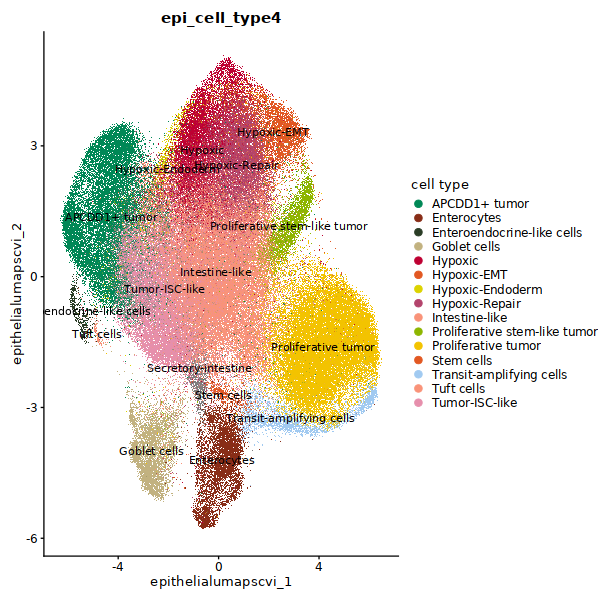

In [53]:
set_size(6,6)
DimPlot(epithelial_reint, reduction = 'epithelial_umap.scvi', 
        group.by = 'epi_cell_type4', 
        label = TRUE) + scale_color_manual(values=epi.cell.color, name='cell type')

In [54]:
DefaultAssay(epithelial_reint) <- 'RNA'

rdylbu_colors <- rev(colorRampPalette(brewer.pal(10, "RdYlBu"))(10))
color_breaks <- c(-2, -1, 0, 1, 2)
#dotplot.color <- colorRampPalette(c('#eae2b7','#fcbf49','#f77f00','#d62828', '#003049'))(10) 

p6 <- DotPlot(epithelial_reint, 
              group.by = 'epi_cell_type4', 
              feature = module_geneset$`Injury Repair`
             ) +
      theme(axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0.5)) + #, legend.byrow = FALSE, legend.direction = 'vertical', legend.position = 'bottom') +
      coord_fixed() +
      scale_color_gradientn(colors = rdylbu_colors, 
                            limits = c(-3, 3),    # Set limits to -2 and 2
                            breaks = color_breaks # Specify the breaks
      ) +         
      scale_size_area(limits = c(0, 100), oob = scales::squish)

set_size(30,8)
pdf("DotPlot_Injury_Repair.pdf", width=24, height=12)
print(p6)
dev.off()

Warning message:
“The following requested variables were not found: C5ORF17, RP11-834C11.4, PRKCDBP, AC006262.5, ALPPL2, C5ORF58, FAM132A, RARRES3, PTRF”
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for size is already present.
Adding another scale for size, which will replace the existing scale.


png 
  2

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for size is already present.
Adding another scale for size, which will replace the existing scale.


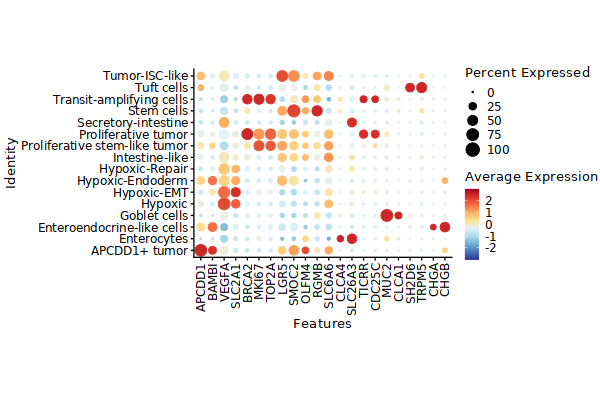

In [55]:
DefaultAssay(epithelial_reint) <- 'RNA'

rdylbu_colors <- rev(colorRampPalette(brewer.pal(10, "RdYlBu"))(10))
color_breaks <- c(-2, -1, 0, 1, 2)
#dotplot.color <- colorRampPalette(c('#eae2b7','#fcbf49','#f77f00','#d62828', '#003049'))(10) 

p6 <- DotPlot(epithelial_reint, 
              group.by = 'epi_cell_type4', 
              feature = c('APCDD1', 'BAMBI', 'VEGFA', 'SLC2A1', 'BRCA2', 'MKI67', 'TOP2A', 'LGR5', 'SMOC2', 'OLFM4', 'RGMB', 'SLC6A6', 
                          'CLCA4', 'SLC26A3', 'TICRR', 'CDC25C', 'MUC2', 'CLCA1', 'SH2D6', 'TRPM5', 'CHGA', 'CHGB')
             ) +
      theme(axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0.5)) + #, legend.byrow = FALSE, legend.direction = 'vertical', legend.position = 'bottom') +
      coord_fixed() +
      scale_color_gradientn(colors = rdylbu_colors, 
                            limits = c(-3, 3),    # Set limits to -2 and 2
                            breaks = color_breaks # Specify the breaks
      ) +         
      scale_size_area(limits = c(0, 100), oob = scales::squish)

set_size(6,4)
p6

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 27560
Number of edges: 417461

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8825
Number of communities: 616
Elapsed time: 2 seconds


612 singletons identified. 4 final clusters.



[1] "APCDD1+ tumor_3"               "Proliferative tumor"          
 [3] "Intestine-like"                "Hypoxic"                      
 [5] "Hypoxic-Repair"                "Tumor-ISC-like"               
 [7] "Secretory-intestine"           "Proliferative stem-like tumor"
 [9] "APCDD1+ tumor_1"               "APCDD1+ tumor_0"              
[11] "Hypoxic-EMT"                   "APCDD1+ tumor_2"              
[13] "Hypoxic-Endoderm"              "Enteroendocrine-like cells"   
[15] "Goblet cells"                  "Transit-amplifying cells"     
[17] "Enterocytes"                   "Stem cells"                   
[19] "Tuft cells"

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



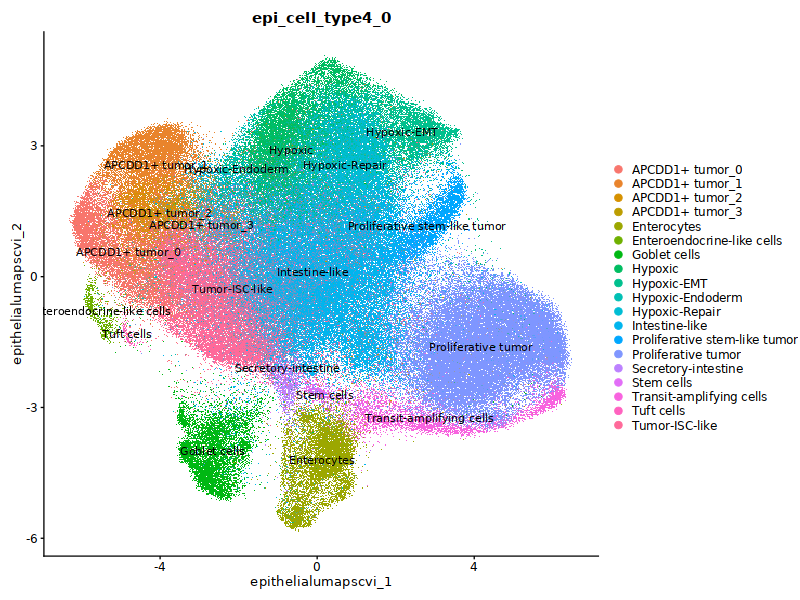

In [56]:
Idents(epithelial_reint) = "epi_cell_type4"
epithelial_reint = FindSubCluster(object = epithelial_reint,
                                  cluster = 'APCDD1+ tumor',
                                  graph.name = 'RNA_snn',
                                  subcluster.name = "epi_cell_type4_0",
                                  resolution = 0.2,
                                  algorithm = 1
                                  )
unique(epithelial_reint$epi_cell_type4_0)

set_size(8,6)
DimPlot(epithelial_reint, reduction = 'epithelial_umap.scvi', group.by = 'epi_cell_type4_0', label = TRUE)

In [57]:
epithelial_reint@meta.data <- epithelial_reint@meta.data %>% 
                              mutate(epi_cell_type5 = case_when(
                                  epi_cell_type4_0 == 'APCDD1+ tumor_0' ~ 'APCDD1 tumor',
                                  epi_cell_type4_0 == 'APCDD1+ tumor_1' ~ 'APCDD1 tumor',
                                  epi_cell_type4_0 == 'APCDD1+ tumor_2' ~ 'APCDD1-Neuroendocrine',
                                  epi_cell_type4_0 == 'APCDD1+ tumor_3' ~ 'APCDD1 tumor',
                                  TRUE ~ epi_cell_type4
                              ))

In [58]:
epithelial_reint$epi_cell_type5 <- factor(epithelial_reint$epi_cell_type5, 
                                         levels = c('APCDD1 tumor', "APCDD1-Neuroendocrine", 
                                                    "Hypoxic", "Hypoxic-Endoderm", "Hypoxic-Repair", "Hypoxic-EMT",   
                                                    'Proliferative tumor', "Intestine-like", "Secretory-intestine",
                                                    "Tumor-ISC-like", 'Proliferative stem-like tumor',
                                                    "Stem cells",
                                                    'Enterocytes', 'Transit-amplifying cells', 
                                                    'Goblet cells', 'Tuft cells', 'Enteroendocrine-like cells'
                                                   ))

In [59]:
epi.cell.color2 <- c("APCDD1 tumor" = '#008856',
                    "APCDD1-Neuroendocrine" = '#604197',
                    "Hypoxic" = '#be0032',
                    "Hypoxic-Endoderm" = '#dcd300',
                    "Hypoxic-Repair" = '#b3446c',
                    "Hypoxic-EMT" = '#e25822',
                    "Proliferative tumor" = '#f3c300',
                    "Proliferative stem-like tumor" = '#8db600',
                    "Tumor-ISC-like" = '#e68fac',
                    "Intestine-like" = '#f99379',
                    "Secretory-intestine" = 'firebrick',
                    "Stem cells" = 'khaki',
                    "Enterocytes" = '#882d17',
                    "Transit-amplifying cells" = '#a1caf1',
                    "Goblet cells" = '#c2b280',
                    "Tuft cells" = '#f99379',
                    "Enteroendocrine-like cells" = '#2b3d26'
                   )

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



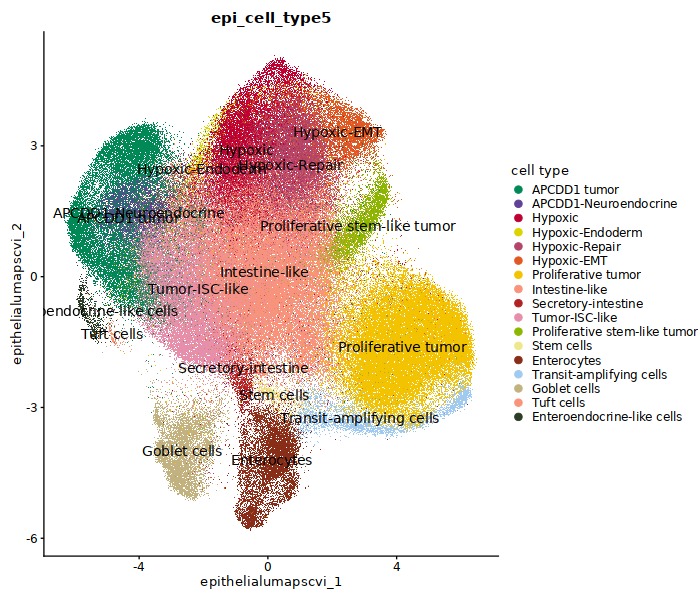

In [60]:
set_size(7,6)
DimPlot(epithelial_reint, reduction = 'epithelial_umap.scvi', 
        group.by = 'epi_cell_type5', label.size = 5,
        label = TRUE) + scale_color_manual(values=epi.cell.color2, name='cell type')

In [61]:
pdf("Dimplot_mCRC_epithelial_cell_type5.pdf", width=7, height=6)
DimPlot(epithelial_reint, reduction = 'epithelial_umap.scvi', 
        group.by = 'epi_cell_type5', label.size = 5,
        label = FALSE) + scale_color_manual(values=epi.cell.color2, name='cell type')
dev.off()

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



png 
  2

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



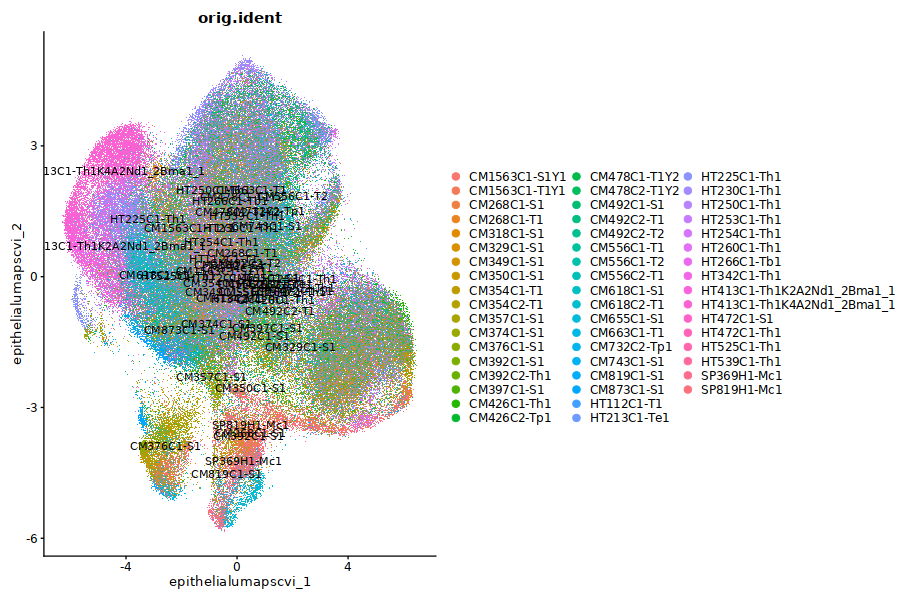

In [62]:
set_size(9,6)
DimPlot(epithelial_reint, reduction = 'epithelial_umap.scvi', 
        group.by = 'orig.ident', 
        label = TRUE) 

In [63]:
colnames(epithelial_reint@meta.data)

[1] "orig.ident"              "Patient_ID"             
 [3] "nCount_RNA"              "nFeature_RNA"           
 [5] "percent.mito"            "nCount_SCT"             
 [7] "nFeature_SCT"            "seurat_clusters"        
 [9] "S.Score"                 "G2M.Score"              
[11] "Phase"                   "SCT_snn_res.2"          
[13] "cell_type_RNA"           "cell_type_RNA_simple"   
[15] "Age"                     "Sex"                    
[17] "Site_of_Origin"          "Tissue_Type"            
[19] "Primary_Side"            "MSI"                    
[21] "MSI_score"               "Tx_in_6mo"              
[23] "scrublet_doublet"        "DF_doublet"             
[25] "cell_type_integrated"    "cell_type_simple"       
[27] "cell_type_integrated2"   "cell_type_simple2"      
[29] "mCRCv6_clusters_0.2"     "mCRCv6_clusters_0.4"    
[31] "mCRCv6_clusters_0.6"     "mCRCv6_clusters_0.8"    
[33] "mCRCv6_clusters_1"       "mCRCv6_clusters_1.2"    
[35] "mCRCv6_clusters_1.4"     "mCRCv6_clusters_1.6"    
[37] "mCRCv6_clusters_1.8"     "mCRCv6_clusters_2"      
[39] "cell_type_simple3"       "cell_type_integrated3"  
[41] "epithelial_clusters_0.1" "APC_mutation"           
[43] "KRAS_mutation"           "TP53_mutation"          
[45] "APC_mut"                 "KRAS_mut"               
[47] "TP53_mut"                "epithelial_cluster_sub6"
[49] "epi_clusters_0.1"        "epithelial_cluster_sub0"
[51] "epithelial_cluster_sub2" "epithelial_cluster_sub3"
[53] "epi_cell_type"           "removal"                
[55] "epi_cell_type_sub0"      "epi_cell_type2"         
[57] "epi_cell_type2_0"        "epi_cell_type3"         
[59] "epi_cell_type3_0"        "epi_cell_type4"         
[61] "epi_cell_type4_0"        "epi_cell_type5"

In [66]:
output_dir = '/diskmnt/Projects/MetNet_analysis_2/Colorectal/Analysis/snRNA/01_Cohort/Metadata/'
celltype_update <- epithelial_reint@meta.data %>% select(epi_cell_type, epi_cell_type5)
fwrite(celltype_update, file.path(output_dir, "57_Integrated_normalized_mCRC_snRNA_noDB_v7_clean5_epithelial_cell_type_20250126.csv"), row.names=TRUE)

In [7]:
setwd('/diskmnt/Projects/MetNet_analysis_2/Colorectal/snMultiome/rds_objects/cell_types_subset/RNA/epithelial')
saveRDS(epithelial_reint, '57_Integrated_normalized_mCRC_snRNA_noDB_v7_epithelial_clean5.rds')

In [15]:
setwd('/diskmnt/Projects/MetNet_analysis_2/Colorectal/snMultiome/rds_objects/cell_types_subset/RNA/epithelial')
epithelial_reint <- readRDS('57_Integrated_normalized_mCRC_snRNA_noDB_v7_epithelial_clean5.rds')
epithelial_reint

An object of class Seurat 
71822 features across 225162 samples within 2 assays 
Active assay: RNA (36601 features, 0 variable features)
 2 layers present: counts, data
 1 other assay present: SCT
 8 dimensional reductions calculated: pca, umap.rna, integrated.scvi, mCRCv4_umap.scvi, mCRCv5_umap.scvi, mCRCv6_umap.scvi, epithelial_umap.scvi, epithelial_umap2.scvi

In [16]:
colnames(epithelial_reint@meta.data)

[1] "orig.ident"              "Patient_ID"             
 [3] "nCount_RNA"              "nFeature_RNA"           
 [5] "percent.mito"            "nCount_SCT"             
 [7] "nFeature_SCT"            "seurat_clusters"        
 [9] "S.Score"                 "G2M.Score"              
[11] "Phase"                   "SCT_snn_res.2"          
[13] "cell_type_RNA"           "cell_type_RNA_simple"   
[15] "Age"                     "Sex"                    
[17] "Site_of_Origin"          "Tissue_Type"            
[19] "Primary_Side"            "MSI"                    
[21] "MSI_score"               "Tx_in_6mo"              
[23] "scrublet_doublet"        "DF_doublet"             
[25] "cell_type_integrated"    "cell_type_simple"       
[27] "cell_type_integrated2"   "cell_type_simple2"      
[29] "mCRCv6_clusters_0.2"     "mCRCv6_clusters_0.4"    
[31] "mCRCv6_clusters_0.6"     "mCRCv6_clusters_0.8"    
[33] "mCRCv6_clusters_1"       "mCRCv6_clusters_1.2"    
[35] "mCRCv6_clusters_1.4"     "mCRCv6_clusters_1.6"    
[37] "mCRCv6_clusters_1.8"     "mCRCv6_clusters_2"      
[39] "cell_type_simple3"       "cell_type_integrated3"  
[41] "epithelial_clusters_0.1" "APC_mutation"           
[43] "KRAS_mutation"           "TP53_mutation"          
[45] "APC_mut"                 "KRAS_mut"               
[47] "TP53_mut"                "epithelial_cluster_sub6"
[49] "epi_clusters_0.1"        "epithelial_cluster_sub0"
[51] "epithelial_cluster_sub2" "epithelial_cluster_sub3"
[53] "epi_cell_type"           "removal"                
[55] "epi_cell_type_sub0"      "epi_cell_type2"         
[57] "epi_cell_type2_0"        "epi_cell_type3"         
[59] "epi_cell_type3_0"        "epi_cell_type4"         
[61] "epi_cell_type4_0"        "epi_cell_type5"         
[63] "epi_cell_type6"

In [17]:
unique(epithelial_reint$epi_cell_type6)

[1] Non_Canonical_CRC_2                   Canonical_CRC_Intestine_Proliferation
 [3] Canonical_CRC_Intestine               Non_Canonical_CRC_1                  
 [5] Canonical_CRC_Stem                    Canonical_CRC_Stem_Proliferation     
 [7] Enteroendocrine-like cells            Goblet cells                         
 [9] Transit-amplifying cells              Enterocytes                          
[11] Stem cells                            Tuft cells                           
12 Levels: Enteroendocrine-like cells Tuft cells Goblet cells ... Non_Canonical_CRC_1

In [18]:
output_dir = '/diskmnt/Projects/MetNet_analysis_2/Colorectal/Analysis/snRNA/01_Cohort/Metadata/'
celltype_update <- epithelial_reint@meta.data %>% select(epi_cell_type, epi_cell_type6)
fwrite(celltype_update, file.path(output_dir, "57_Integrated_normalized_mCRC_snRNA_noDB_v7_clean5_epithelial_cell_type_20250322.csv"), row.names=TRUE)

In [10]:
Idents(epithelial_reint) = "epi_cell_type6"
epithelial_markers = FindAllMarkers(epithelial_reint, 
                                    min.pct=0.1, 
                                    logfc.threshold=0.25, 
                                    only.pos = TRUE, 
                                    return.thresh = 0.01,
                                    test.use = 'MAST'
                                    )

write.csv(epithelial_markers, "mCRC_epithelial_type6_MAST_deg.csv", row.names = TRUE)

Calculating cluster Enteroendocrine-like cells

Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 3.8 GiB”

 Completed [--------------------------------------------]   0% with 0 failures

 Completed [--------------------------------------------]   1% with 0 failures

 Completed [>-------------------------------------------]   1% with 0 failures

 Completed [>-------------------------------------------]   2% with 0 failures

 Completed [>-------------------------------------------]   3% with 0 failures

 Completed [=>------------------------------------------]   3% with 0 failures

 Completed [=>------------------------------------------]   4% with 0 failures

 Completed [=>------------------------------------------]   5% with 0 failures

 Completed [=>------------------------------------------]   6% with 0 failures

 Completed [==>-----------------------------------------]   6% with 0 failures

 Completed [==>---------------------------------------

In [12]:
tumor <- epithelial_reint %>% 
         subset(epi_cell_type6 %in% c('Canonical_CRC_Intestine_Proliferation', 
                                      'Canonical_CRC_Stem_Proliferation', 
                                      'Canonical_CRC_Intestine', 
                                      'Canonical_CRC_Stem',
                                      'Non_Canonical_CRC_2',
                                      'Non_Canonical_CRC_1'))
tumor

An object of class Seurat 
71822 features across 202503 samples within 2 assays 
Active assay: RNA (36601 features, 0 variable features)
 2 layers present: counts, data
 1 other assay present: SCT
 8 dimensional reductions calculated: pca, umap.rna, integrated.scvi, mCRCv4_umap.scvi, mCRCv5_umap.scvi, mCRCv6_umap.scvi, epithelial_umap.scvi, epithelial_umap2.scvi

In [13]:
Idents(tumor) = "epi_cell_type6"
tumor_markers = FindAllMarkers(tumor, 
                               min.pct=0.1, 
                               logfc.threshold=0.25, 
                               only.pos = TRUE, 
                               return.thresh = 0.01,
                               test.use = 'MAST')

write.csv(tumor, "mCRC_tumor_MAST_deg.csv", row.names = TRUE)

Calculating cluster Canonical_CRC_Intestine_Proliferation

Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 3.0 GiB”

 Completed [--------------------------------------------]   0% with 0 failures

 Completed [--------------------------------------------]   1% with 0 failures

 Completed [>-------------------------------------------]   1% with 0 failures

 Completed [>-------------------------------------------]   2% with 0 failures

 Completed [>-------------------------------------------]   3% with 0 failures

 Completed [=>------------------------------------------]   3% with 0 failures

 Completed [=>------------------------------------------]   4% with 0 failures

 Completed [=>------------------------------------------]   5% with 0 failures

 Completed [=>------------------------------------------]   6% with 0 failures

 Completed [==>-----------------------------------------]   6% with 0 failures

 Completed [==>----------------------------

ERROR: Error in as.data.frame.default(x[[i]], optional = TRUE): cannot coerce class ‘structure("Seurat", package = "SeuratObject")’ to a data.frame


In [5]:
epithelial_reint@meta.data <- epithelial_reint@meta.data %>% 
                              mutate(epi_cell_type6 = case_when(
                                  epi_cell_type5 == 'Tumor-ISC-like' ~ 'Canonical_CRC_Stem',
                                  epi_cell_type5 == 'Intestine-like' ~ 'Canonical_CRC_Intestine',
                                  epi_cell_type5 == 'Secretory-intestine' ~ 'Canonical_CRC_Intestine',
                                  epi_cell_type5 == 'Proliferative tumor' ~ 'Canonical_CRC_Intestine_Proliferation',
                                  epi_cell_type5 == 'Proliferative stem-like tumor' ~ 'Canonical_CRC_Stem_Proliferation',
                                  epi_cell_type5 == 'Hypoxic' ~ 'Non_Canonical_CRC_1',
                                  epi_cell_type5 == 'Hypoxic-Repair' ~ 'Non_Canonical_CRC_1',
                                  epi_cell_type5 == 'Hypoxic-EMT' ~ 'Non_Canonical_CRC_1',
                                  epi_cell_type5 == 'Hypoxic-Endoderm' ~ 'Non_Canonical_CRC_1',
                                  epi_cell_type5 == 'APCDD1 tumor' ~ 'Non_Canonical_CRC_2',
                                  epi_cell_type5 == 'APCDD1-Neuroendocrine' ~ 'Non_Canonical_CRC_2',
                                  TRUE~epi_cell_type5
             ))

In [6]:
epithelial_reint$epi_cell_type6 <- factor(epithelial_reint$epi_cell_type6, 
                                         levels = rev(c('Non_Canonical_CRC_1', 'Non_Canonical_CRC_2',
                                                        'Canonical_CRC_Stem', 'Canonical_CRC_Intestine', 
                                                        'Canonical_CRC_Stem_Proliferation', 
                                                        'Canonical_CRC_Intestine_Proliferation', 
                                                        'Stem cells', 'Transit-amplifying cells', 'Enterocytes',
                                                        'Goblet cells', 'Tuft cells', 'Enteroendocrine-like cells'
                                                   )))

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for size is already present.
Adding another scale for size, which will replace the existing scale.


png 
  2

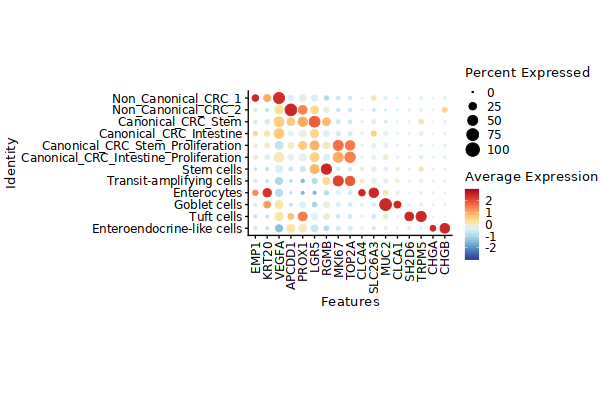

In [51]:
DefaultAssay(epithelial_reint) <- 'RNA'

rdylbu_colors <- rev(colorRampPalette(brewer.pal(10, "RdYlBu"))(10))
color_breaks <- c(-2, -1, 0, 1, 2)
#dotplot.color <- colorRampPalette(c('#eae2b7','#fcbf49','#f77f00','#d62828', '#003049'))(10) 

p6 <- DotPlot(epithelial_reint, 
              group.by = 'epi_cell_type6', 
              feature = c('EMP1', 'KRT20', 'VEGFA', 'APCDD1', 'PROX1', 'LGR5', 'RGMB', 'MKI67', 'TOP2A', 
                          'CLCA4', 'SLC26A3', 'MUC2', 'CLCA1', 'SH2D6', 'TRPM5', 'CHGA', 'CHGB')
             ) +
      theme(axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0.5)) + #, legend.byrow = FALSE, legend.direction = 'vertical', legend.position = 'bottom') +
      coord_fixed() +
      scale_color_gradientn(colors = rdylbu_colors, 
                            limits = c(-3, 3),    # Set limits to -2 and 2
                            breaks = color_breaks # Specify the breaks
      ) +         
      scale_size_area(limits = c(0, 100), oob = scales::squish)

set_size(6,4)
p6

output_dir = '/diskmnt/Projects/MetNet_analysis_2/Colorectal/Analysis/Manuscript/Figure_3'
pdf(file.path(output_dir, "Dotplot_mCRC_epithelial_cell_type_snRNA.pdf"), width=8, height=8)
print(p6)
dev.off()

In [35]:
epi.cell.color2 <- c("Non_Canonical_CRC_2" = '#008856',
                     "Non_Canonical_CRC_1" = '#be0032',
                     "Canonical_CRC_Intestine" = '#e25822',
                     "Canonical_CRC_Stem_Proliferation" = '#f3c300',
                     "Canonical_CRC_Intestine_Proliferation" = '#8db600',
                     "Canonical_CRC_Stem" = '#e68fac',
                     "Stem cells" = '#604197',
                     "Enterocytes" = '#882d17',
                     "Transit-amplifying cells" = '#a1caf1',
                     "Goblet cells" = '#c2b280',
                     "Tuft cells" = '#f99379',
                     "Enteroendocrine-like cells" = '#2b3d26'
                   )

In [37]:
epithelial_reint$epi_cell_type6 <- factor(epithelial_reint$epi_cell_type6, 
                                         levels = c('Non_Canonical_CRC_1', 'Non_Canonical_CRC_2',
                                                        'Canonical_CRC_Stem', 'Canonical_CRC_Intestine', 
                                                        'Canonical_CRC_Stem_Proliferation', 
                                                        'Canonical_CRC_Intestine_Proliferation', 
                                                        'Stem cells', 'Transit-amplifying cells', 'Enterocytes',
                                                        'Goblet cells', 'Tuft cells', 'Enteroendocrine-like cells'
                                                   ))

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



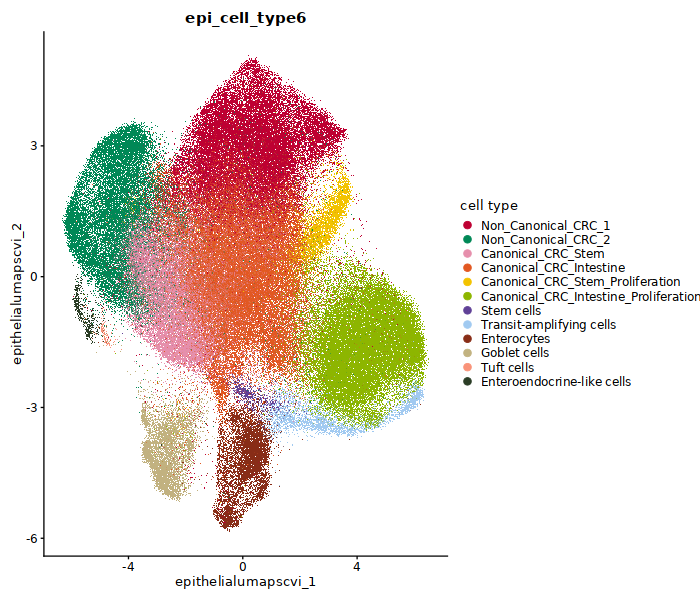

In [39]:
set_size(7,6)
DimPlot(epithelial_reint, reduction = 'epithelial_umap.scvi', 
        group.by = 'epi_cell_type6', label.size = 5,
        label = FALSE) + scale_color_manual(values=epi.cell.color2, name='cell type') -> p2

p2

In [41]:
output_dir = '/diskmnt/Projects/MetNet_analysis_2/Colorectal/Analysis/Manuscript/Figure_3'
pdf(file.path(output_dir, "Dimplot_mCRC_epithelial_cell_type_snRNA.pdf"), width=8, height=6)
print(p2)
dev.off()

png 
  2